En este código se visualizan los resultados de Extra Trees. Para el Grid Search, hay que elegir número de experimento y métrica a visualizar.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/repo_tesis/entorno_tesis_Molina"
!source bin/activate

Mounted at /content/drive
/content/drive/My Drive/repo_tesis/entorno_tesis_Molina


In [ ]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import os

# Grid Search

## Separación de datos por sujeto

In [ ]:
# Levanto los datos de los resultados del Grid Search
%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS"

pipelines_CV = joblib.load('gs_gbm_PredefinedSplit.pkl')
particiones_CV = joblib.load('ps_gbm_PredefinedSplit.pkl')

/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS


## Separación de datos por repetición

In [ ]:
# Levanto los datos de los resultados del Grid Search
%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS"

pipelines_CV = joblib.load('gs_gbm_PredefinedSplit_sep_rep.pkl')
particiones_CV = joblib.load('ps_gbm_PredefinedSplit_sep_rep.pkl')

/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS


## Estructuro, visualizo y guardo los datos de interés
Objetivos:

*   Visualización.
*   Guardar métricas en Comet de forma más amigable.

In [ ]:
# elijo el numero de experimento. Tengo 10 experimentos, uno por sujeto o fold
i = 9  # PARAMETRO DE ENTRADA- de 0 a 9 inclusive

# MAS ABAJO TENGO QUE ELEGIR LA METRICA QUE QUIERO VISUALIZAR

# elijo el directorio donde quiero guardar los resultados del experimento actual
ruta_imag = "/content/drive/My Drive/tesis_Molina/resultados/HW/gbm/x_rep/sub" + str(i+1) + "_test"
os.makedirs(ruta_imag, exist_ok=True) # me fijo si existe, si no, lo creo
os.chdir(ruta_imag) # me situo en el directorio

# miro los resultados del Grid Search para el sujeto elegido
grid_search = pipelines_CV[i]
# obtengo los resultados de Grid Search
cv_results = grid_search.cv_results_
# creo un DataFrame con los resultados
df_results = pd.DataFrame(cv_results)

# obtengo la lista de nombres de las columnas
column_names = df_results.columns.tolist()

print(column_names)
# df_results["params"]
# a= cv_results['mean_score_time']
# a
df_results['params']

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_accuracy', 'split4_train_accuracy', 'split5_train_accuracy', 'split6_train_accuracy', 'split7_train_accuracy', 'split8_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'split5_test_precision', 'split6_test_precision', 'split7_test_precision', 'split8_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_train_precision', 'split1_train_precis

0      {'model__n_estimators': 5}
1     {'model__n_estimators': 50}
2     {'model__n_estimators': 75}
3    {'model__n_estimators': 100}
4    {'model__n_estimators': 500}
Name: params, dtype: object

Genero un diccionario en el que discrimino por valor de hiperparámetro y elijo guardar determinadas columnas.

También elijo qué métrica quiero visualizar.

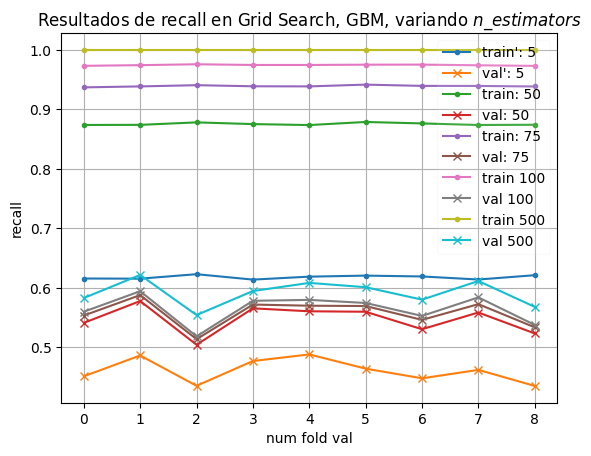

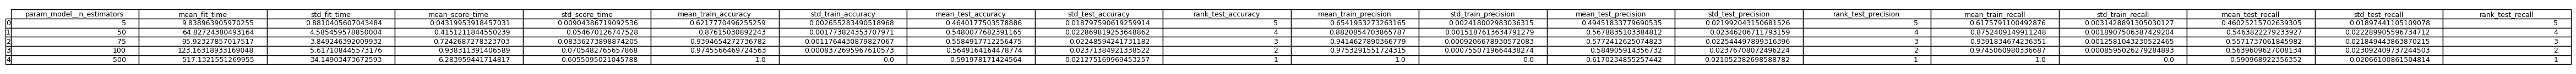

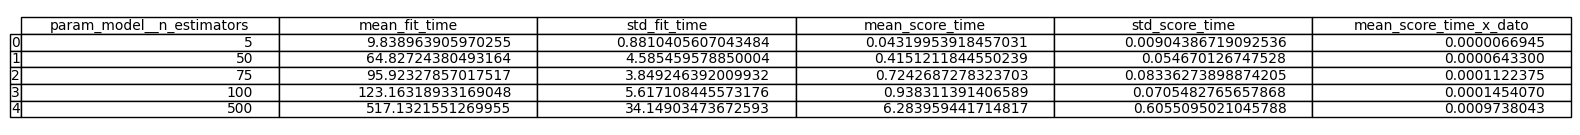

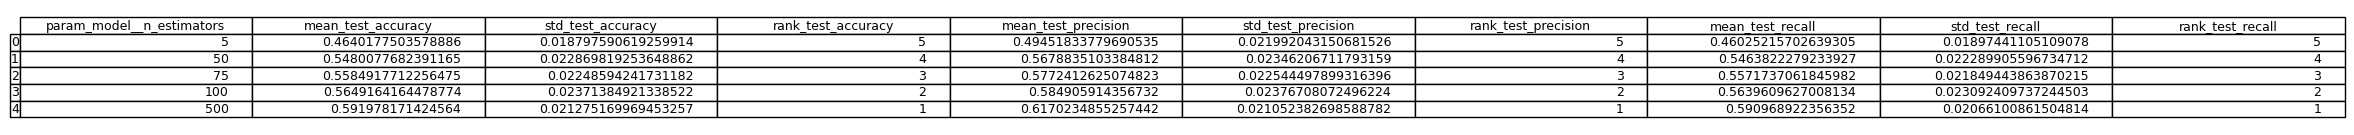

In [ ]:
# defino la metrica a visualizar
# PARAMETRO DE ENTRADA
metric_name = 'recall'  # accuracy, precision o recall funciona bien

# para metricas me sirve esta definicion
columns_names = ['split0_test_'+metric_name, 'split1_test_'+metric_name, 'split2_test_'+metric_name,
                 'split3_test_'+metric_name, 'split4_test_'+metric_name, 'split5_test_'+metric_name,
                 'split6_test_'+metric_name, 'split7_test_'+metric_name, 'split8_test_'+metric_name,
                 'mean_test_'+metric_name, 'std_test_'+metric_name,
                 'split0_train_'+metric_name, 'split1_train_'+metric_name, 'split2_train_'+metric_name,
                 'split3_train_'+metric_name, 'split4_train_'+metric_name, 'split5_train_'+metric_name,
                 'split6_train_'+metric_name, 'split7_train_'+metric_name, 'split8_train_'+metric_name]

# esto es para metricas
# lo saco de df_results["params"]
# param_comb = [{'model__n_estimators': 5}, {'model__n_estimators': 50}, {'model__n_estimators': 75}, {'model__n_estimators': 100}, {'model__n_estimators': 500}]
param_comb = df_results.params.tolist()
def extract_grid_search_results(cv_results, column_names, param_comb):
    """
    Extrae resultados específicos de cv_results de GridSearchCV.

    Args:
    cv_results (dict): Diccionario de resultados de GridSearchCV.
    column_names (list): Lista de nombres de columnas que se desean extraer de cv_results.
    param_comb (list): Lista de combinaciones de hiperparámetros a incluir en los resultados.

    Returns:
    dict: Diccionario con los resultados extraídos.
    """
    resultados = {}

    # Filtrar combinaciones de hiperparámetros
    for i in range(len(cv_results['params'])):
        current_params = cv_results['params'][i]
        if current_params in param_comb:
            metrics = {}
            for column in column_names:
                metrics[column] = cv_results[column][i]
            resultados[str(current_params)] = metrics

    return resultados

resultados = extract_grid_search_results(grid_search.cv_results_, columns_names, param_comb)
# pd.DataFrame(resultados)


#------ AGREGO SOLO PARA EJECUTAR MÁS FÁCIL--------------------
# Tomo una estructura de datos del bloque anterior (estructuración de datos) y los visualizo
# está hecho para visualizar una metrica por fold
data = resultados.copy()

# esto me sirve para graficar métricas
# Voy a hacer el gráfico por folds
columns_to_visualize = ['split0_test_'+metric_name, 'split1_test_'+metric_name, 'split2_test_'+metric_name,
                 'split3_test_'+metric_name, 'split4_test_'+metric_name, 'split5_test_'+metric_name,
                 'split6_test_'+metric_name, 'split7_test_'+metric_name, 'split8_test_'+metric_name,
                 'split0_train_'+metric_name, 'split1_train_'+metric_name, 'split2_train_'+metric_name,
                 'split3_train_'+metric_name, 'split4_train_'+metric_name, 'split5_train_'+metric_name,
                 'split6_train_'+metric_name, 'split7_train_'+metric_name, 'split8_train_'+metric_name]
vectores_grafica = []
labels = []
for outer_key, inner_dict in data.items():
  labels.append(outer_key)
  test_values = []
  train_values = []
  for inner_key, inner_value in inner_dict.items():
    if (('test' in inner_key) and (inner_key in columns_to_visualize)):
      test_values.append(inner_value)
    elif (('train' in inner_key) and (inner_key in columns_to_visualize)):
      train_values.append(inner_value)
  vectores_grafica.append([train_values, test_values])

plt.figure()
for i in range(len(vectores_grafica)):
  plt.plot(vectores_grafica[i][0], '.-', label = 'train'+labels[i][-5:-1])  # la 0 es la de train
  plt.plot(vectores_grafica[i][1], '-x', label = 'val'+labels[i][-5:-1])  # la 1 es la de val
plt.xlabel("num fold val")
plt.ylabel(metric_name)
plt.legend(fancybox=True, framealpha=0.1)
plt.title("Resultados de " + metric_name + " en Grid Search, GBM, variando $n\_estimators$")
plt.grid()
plt.savefig(metric_name + '.png')

joblib.dump(vectores_grafica, metric_name + '.pkl')

#-------------------------------------- GUARDO OTRAS METRICAS EN FORMA DE TABLA-------------------------
# para atributos que no son métricas
columns_names = [
    'param_model__n_estimators', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_train_accuracy', 'std_train_accuracy',
    'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_train_precision', 'std_train_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_train_recall', 'std_train_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]

attributes_to_save = df_results.loc[:, columns_names]

# En el caso que el resultado sea un df, lo guardo como imagen
joblib.dump(attributes_to_save, "atributos_GridSearch.pkl")

# Guardo todos los atributos
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(60, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_GridSearch.png', bbox_inches='tight')

# Atributos de tiempo
columns_names = [
    'param_model__n_estimators', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]

attributes_to_save = df_results.loc[:, columns_names]
attributes_to_save['mean_score_time_x_dato'] = attributes_to_save['mean_score_time'] / 6453 # 6453 es el largo promedio de un fold

# Convertir los valores de la nueva columna a formato decimal como cadenas de texto
attributes_to_save['mean_score_time_x_dato'] = attributes_to_save['mean_score_time_x_dato'].map(lambda x: '{:.10f}'.format(x))
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(20, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_tiempo_GridSearch.png', bbox_inches='tight')

# Atributos rank, mean y std en val
columns_names = [
    'param_model__n_estimators', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]

attributes_to_save = df_results.loc[:, columns_names]
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(30, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_rank_mean_std_GridSearch.png', bbox_inches='tight')



Elijo qué columnas quiero visualizar del diccionario generado en el bloque anterior *resultados*

In [ ]:
# Tomo una estructura de datos del bloque anterior (estructuración de datos) y los visualizo
# está hecho para visualizar una metrica por fold
data = resultados.copy()

# esto me sirve para graficar métricas
# Voy a hacer el gráfico por folds
columns_to_visualize = ['split0_test_'+metric_name, 'split1_test_'+metric_name, 'split2_test_'+metric_name,
                 'split3_test_'+metric_name, 'split4_test_'+metric_name, 'split5_test_'+metric_name,
                 'split6_test_'+metric_name, 'split7_test_'+metric_name, 'split8_test_'+metric_name,
                 'split0_train_'+metric_name, 'split1_train_'+metric_name, 'split2_train_'+metric_name,
                 'split3_train_'+metric_name, 'split4_train_'+metric_name, 'split5_train_'+metric_name,
                 'split6_train_'+metric_name, 'split7_train_'+metric_name, 'split8_train_'+metric_name]
vectores_grafica = []
labels = []
for outer_key, inner_dict in data.items():
  labels.append(outer_key)
  test_values = []
  train_values = []
  for inner_key, inner_value in inner_dict.items():
    if (('test' in inner_key) and (inner_key in columns_to_visualize)):
      test_values.append(inner_value)
    elif (('train' in inner_key) and (inner_key in columns_to_visualize)):
      train_values.append(inner_value)
  vectores_grafica.append([train_values, test_values])

Guardo y visualizo la métrica elegida

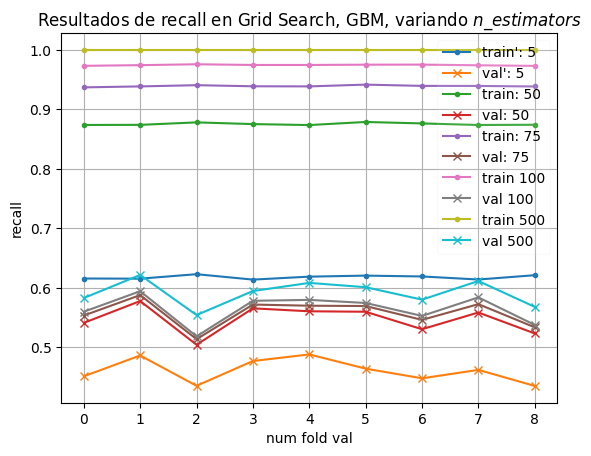

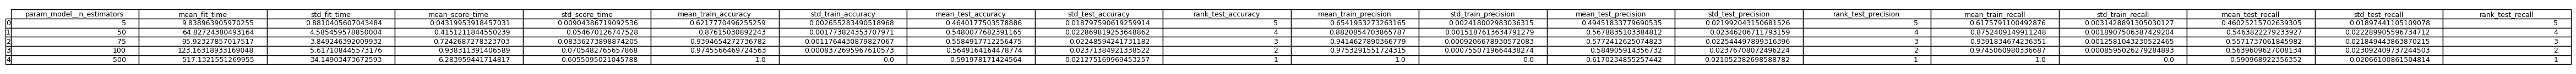

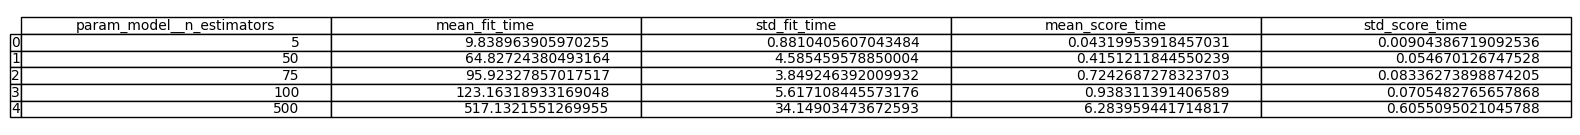

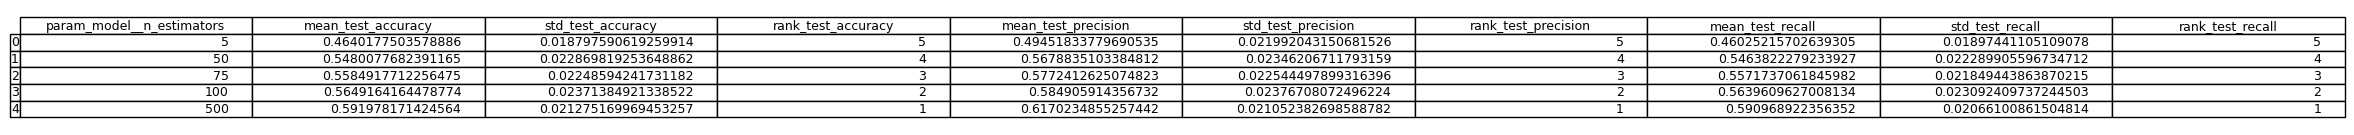

In [ ]:
plt.figure()
for i in range(len(vectores_grafica)):
  plt.plot(vectores_grafica[i][0], '.-', label = 'train'+labels[i][-5:-1])  # la 0 es la de train
  plt.plot(vectores_grafica[i][1], '-x', label = 'val'+labels[i][-5:-1])  # la 1 es la de val
plt.xlabel("num fold val")
plt.ylabel(metric_name)
plt.legend(fancybox=True, framealpha=0.1)
plt.title("Resultados de " + metric_name + " en Grid Search, GBM, variando $n\_estimators$")
plt.grid()
plt.savefig(metric_name + '.png')

joblib.dump(vectores_grafica, metric_name + '.pkl')

#-------------------------------------- GUARDO OTRAS METRICAS EN FORMA DE TABLA-------------------------
# para atributos que no son métricas
columns_names = [
    'param_model__n_estimators', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_train_accuracy', 'std_train_accuracy',
    'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_train_precision', 'std_train_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_train_recall', 'std_train_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]

attributes_to_save = df_results.loc[:, columns_names]

# En el caso que el resultado sea un df, lo guardo como imagen
joblib.dump(attributes_to_save, "atributos_GridSearch.pkl")

# Guardo todos los atributos
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(60, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_GridSearch.png', bbox_inches='tight')

# Atributos de tiempo
columns_names = [
    'param_model__n_estimators', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]

attributes_to_save = df_results.loc[:, columns_names]
attributes_to_save['mean_score_time_x_dato'] = attributes_to_save['mean_score_time'] / 6453 # 6453 es el largo promedio de un fold

# Convertir los valores de la nueva columna a formato decimal como cadenas de texto
attributes_to_save['mean_score_time_x_dato'] = attributes_to_save['mean_score_time_x_dato'].map(lambda x: '{:.10f}'.format(x))
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(20, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_tiempo_GridSearch.png', bbox_inches='tight')

# Atributos rank, mean y std en val
columns_names = [
    'param_model__n_estimators', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]

attributes_to_save = df_results.loc[:, columns_names]
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(30, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_rank_mean_std_GridSearch.png', bbox_inches='tight')


### Elección de hiperparámetros

Separando datos por sujeto

In [ ]:
hyperparams_sub = [50, 50, 50, 50, 50, 50, 50, 50, 50, 50]

Separando datos por repetición

In [ ]:
hyperparams_rep = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [ ]:
%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS"

joblib.dump(hyperparams_sub, 'hyperparams_sub_gbm.pkl')
joblib.dump(hyperparams_rep, 'hyperparams_rep_gbm.pkl')

/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS


['hyperparams_rep_gbm.pkl']